In [1]:
from scipy.io import loadmat
import pandas as pd
import os
import matplotlib.pyplot as plt
from mapd import Trial, Table
import h5py
%load_ext autoreload
%autoreload 2
%matplotlib widget

In [2]:
tbl_dict = {}

Whole cell recordings

In [3]:
tbl_dict['LEDFlashTriggerPiezoControl_241203_F2_C1_Table.parquet'] = '81A06>pJFC7'
# tbl_dict['LEDFlashTriggerPiezoControl_241203_F3_C1_Table.parquet'] = '81A06>pJFC7'    # Not great movement.

Bristle stimulation

In [4]:
tbl_dict['LEDFlashTriggerPiezoControl_241121_F1_C1_Table.parquet'] = '38B38-Gal4>UAS-ChR in WT'
tbl_dict['LEDFlashTriggerPiezoControl_241121_F2_C1_Table.parquet'] = '38B38-Gal4>UAS-ChR in WT'
tbl_dict['LEDFlashTriggerPiezoControl_241122_F1_C1_Table.parquet'] = '38B38-Gal4>UAS-ChR in WT'
tbl_dict['LEDFlashTriggerPiezoControl_241122_F2_C1_Table.parquet'] = '38B38-Gal4>UAS-ChR in WT'

Getting trials


Pandas Apply:   0%|          | 0/482 [00:00<?, ?it/s]

Excluding trials:
[Trial(trial=416, 241121_F1_C1, dT=811.28836, ex=True)]


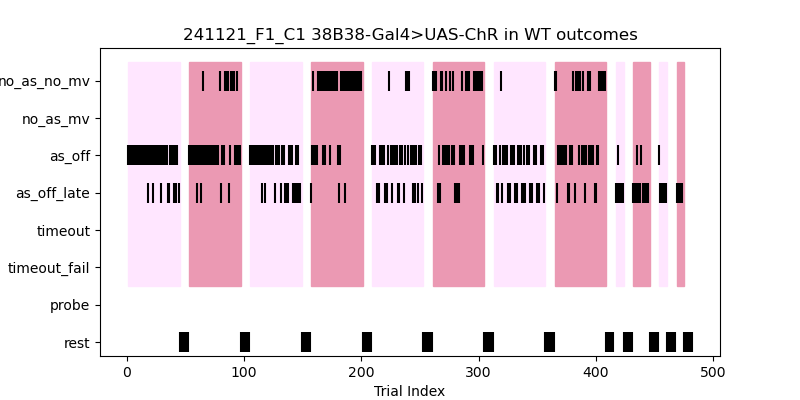

In [11]:
T = Table('LEDFlashTriggerPiezoControl_241121_F1_C1_Table.parquet')
T.add_df_category('cut',trial_min=417,categories='_vnc_status_cat')
T.plot_outcomes(savefig=True)

Pandas Apply:   0%|          | 0/481 [00:00<?, ?it/s]

Histogram for 208 rows
[((-180.0, 60.0, 'lo'), 243), ((-280.0, 60.0, 'hi'), 238)]


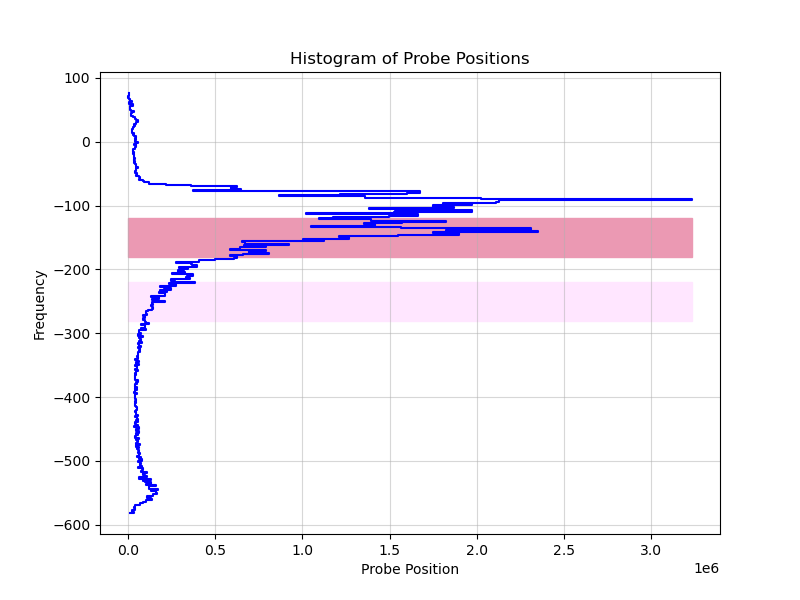

In [22]:
df_filter = {'_vnc_status_cat':'intact','pyasState':'hi'}
# T.plot_probe_distribution(filter=df_filter)
T.plot_probe_distribution(filter=df_filter)


In [27]:
pp = T.probe_position_heatmap()

Pandas Apply:   0%|          | 0/481 [00:00<?, ?it/s]

In [28]:
pp

,probe_positions,probe_min,probe_max,probe_zero
trial_number,,,,
1,"[[-39.519195556640625], [-39.519195556640625],...",-566.265564,-39.206772,630.0
2,"[[-80.13427734375], [-80.13427734375], [-80.13...",-566.577988,-41.393738,630.0
3,"[[-80.44670104980469], [-80.44670104980469], [...",-547.520142,-71.698837,630.0
4,"[[-88.56971740722656], [-88.56971740722656], [...",-546.582870,-64.825516,630.0
5,"[[-77.6348876953125], [-77.6348876953125], [-7...",-559.704666,-53.578262,630.0
...,...,...,...,...
478,"[[-29.834060668945312], [-29.834060668945312],...",-30.458908,-29.209213,630.0
479,"[[-29.521636962890625], [-29.521636962890625],...",-30.771332,-29.209213,630.0
480,"[[-30.146484375], [-30.146484375], [-30.146484...",-30.771332,-29.834061,630.0


In [65]:
tr = T.df.Trial[1]

In [ ]:
import numpy as np
from scipy.stats import mode

arr = tr.probe_position.ravel()
change_points = np.where(np.diff(arr) != 0)[0] + 1

# Calculate lengths of sequences
sequence_lengths = np.diff(np.concatenate(([0], change_points, [len(arr)])))
sequence_mode = mode(sequence_lengths).mode

time_zero_index = tr.params['preDurInSec'] * tr.params['sampratein']
trialsamps = len(tr._trialtime)

indices = np.arange(time_zero_index, trialsamps, sequence_mode)
indices = np.concatenate((np.arange(time_zero_index, -1, -sequence_mode)[::-1], indices)).astype(int)

In [81]:
indices.astype(int)

array([    51,    302,    553, ..., 324343, 324594, 324845])

In [76]:
indices = indices[indices >= 0]
tr.probe_position[indices]

IndexError: arrays used as indices must be of integer (or boolean) type

In [54]:
time_zero_index = np.argmin(np.abs(tr.trialtime - 0))

In [59]:
len(tr.probe_position.ravel())


400089

In [48]:
type(cat.categories[0])

str

In [ ]:

T.df.loc[:,'_vnc_status_cat'].value_counts()


_vnc_status_cat
intact    415
cut        66
Name: count, dtype: int64

In [28]:
isinstance(cat,pd.CategoricalDtype)

True

In [ ]:
T.df.pyasState.

trial_number
1      hi
2      hi
3      hi
4      hi
5      hi
       ..
478    lo
479    lo
480    lo
481    lo
482    lo
Name: pyasState, Length: 481, dtype: object

AttributeError: 'Index' object has no attribute 'codes'

In [ ]:
index[index.get_loc(417):]

In [ ]:
T.df.pyasXPosition.unique()

In [ ]:
new_cols.histogram[1]

iav knockdown or other proprioceptive mutations

In [ ]:
tbl_dict['LEDFlashTriggerPiezoControl_241205_F2_C1_Table.parquet'] = 'iav>Kir2.1'
tbl_dict['LEDFlashTriggerPiezoControl_241205_F3_C1_Table.parquet'] = 'iav>Kir2.1'

Interact with Tables

In [ ]:
T = Table('LEDFlashTriggerPiezoControl_241205_F3_C1_Table.parquet') # LEDFlashTriggerPiezoControl_Raw_241205_F2_C1_243
T.get_trial_metrics()
T.plot_outcomes(savefig=True,format='png')

In [ ]:
T_ = T.df[~T.df['is_rest']]

In [ ]:
for ocb in T_.op_cnd_blocks.unique():
            T_rows = T_[T_.op_cnd_blocks==ocb]

In [ ]:
a = 'hi' if T_rows.pyasState.unique()=='hi' else 'lo'
a

In [ ]:
T._get_genotype()

In [ ]:
T.plot_outcomes(savefig=True)

In [ ]:
plt.close()

In [ ]:
for ocb in T_.op_cnd_blocks.unique():
    T_rows = T_[T_.op_cnd_blocks==ocb]
    tr_max = T_rows.index.max()
    tr_min = T_rows.index.min()
    print(f'[{tr_min}, {tr_max}]')

In [ ]:
T_rows = T